# Neuron-Forest Fire (Name subject to change)
#### (Built under Python 3.11.4)
#### (By: Mark Ehab Aziz)

Project will be done to build and train a neural network using \<insert library name\>.

So far no idea about anything, will be looking to fix that xd.

In [76]:
# Importing Libraries
import pandas as pd                     # Dataframe operations and input
import numpy as np                      # Numerical operations, Linear Alg
import seaborn as sns                   # Visualising
from matplotlib import pyplot as plt    # Big Visualisation core

In [77]:
# Loading Data
# 1 - Path to Different Folder (I'm using within my Repo)
fire_data = pd.read_csv("../dataset/forestfires.csv")

# 2 - Same-File load
#fire_data = pd.read_csv("./forestfires.csv")

# Data Exploration
Taking a look around the rows and columns, whilst writing some definitions here to explain each column.

## Column Descriptions
- X: Spatial Data Coord for "Montesinho Park" map ranging from $1$ to $9$.
- Y: Spatial Data Coord for "Montesinho Park" map ranging from $2$ to $9$.
- month: Month of the year. ['January' $\rightarrow$ 'December]
- day: Day of the week.
- FFMC: Fine Fuel Moisture Code; represents fuel moisture of forest litter fuels under the shade of a forest canopy.\
        It is intended to represent moisture conditions for shaded litter fuels, the equivalent of 16-hour timelag. It ranges from 0-101.
 
- DMC: The Duff Moisture Code; represents fuel moisture of decomposed organic material underneath the litter.\
        System designers suggest that it is represents moisture conditions for the equivalent of 15-day (or 360 hr) timelag fuels. It is unitless and open ended. 
- DC: Drought Code; represents drying deep into the soil. It approximates moisture conditions for the equivalent of 53-day timelag fuels.\
      It is unitless, with a maximum value of 1000.
- ISI: Initial Spread Index; It integrates fuel moisture for fine dead fuels and surface windspeed to estimate a spread potential.\
        ISI is a key input for fire behavior predictions in the FBP system.
- temp: Temperature in Celsius.
- RH: Relative Humidity in $%$.
- wind: Wind Speed in $km/h$.
- rain: Outside Rain in $mm/m^2$.
- area: Burnt Area in forest in hectares.

In [78]:
# Defining n
n = 5

# Getting first/last n rows
display(fire_data.head(), fire_data.tail())

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00
516,6,3,nov,tue,79.5,3.0,106.7,1.1,11.8,31,4.5,0.0,0.00


In [79]:
# Displaying general information
fire_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


There seems to be no missing data.

In [80]:
# Statistical measurements
fire_data.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


There seems to be little to no outliers.\
Will be revealed with plots

Text(0.5, 1.0, 'Area')

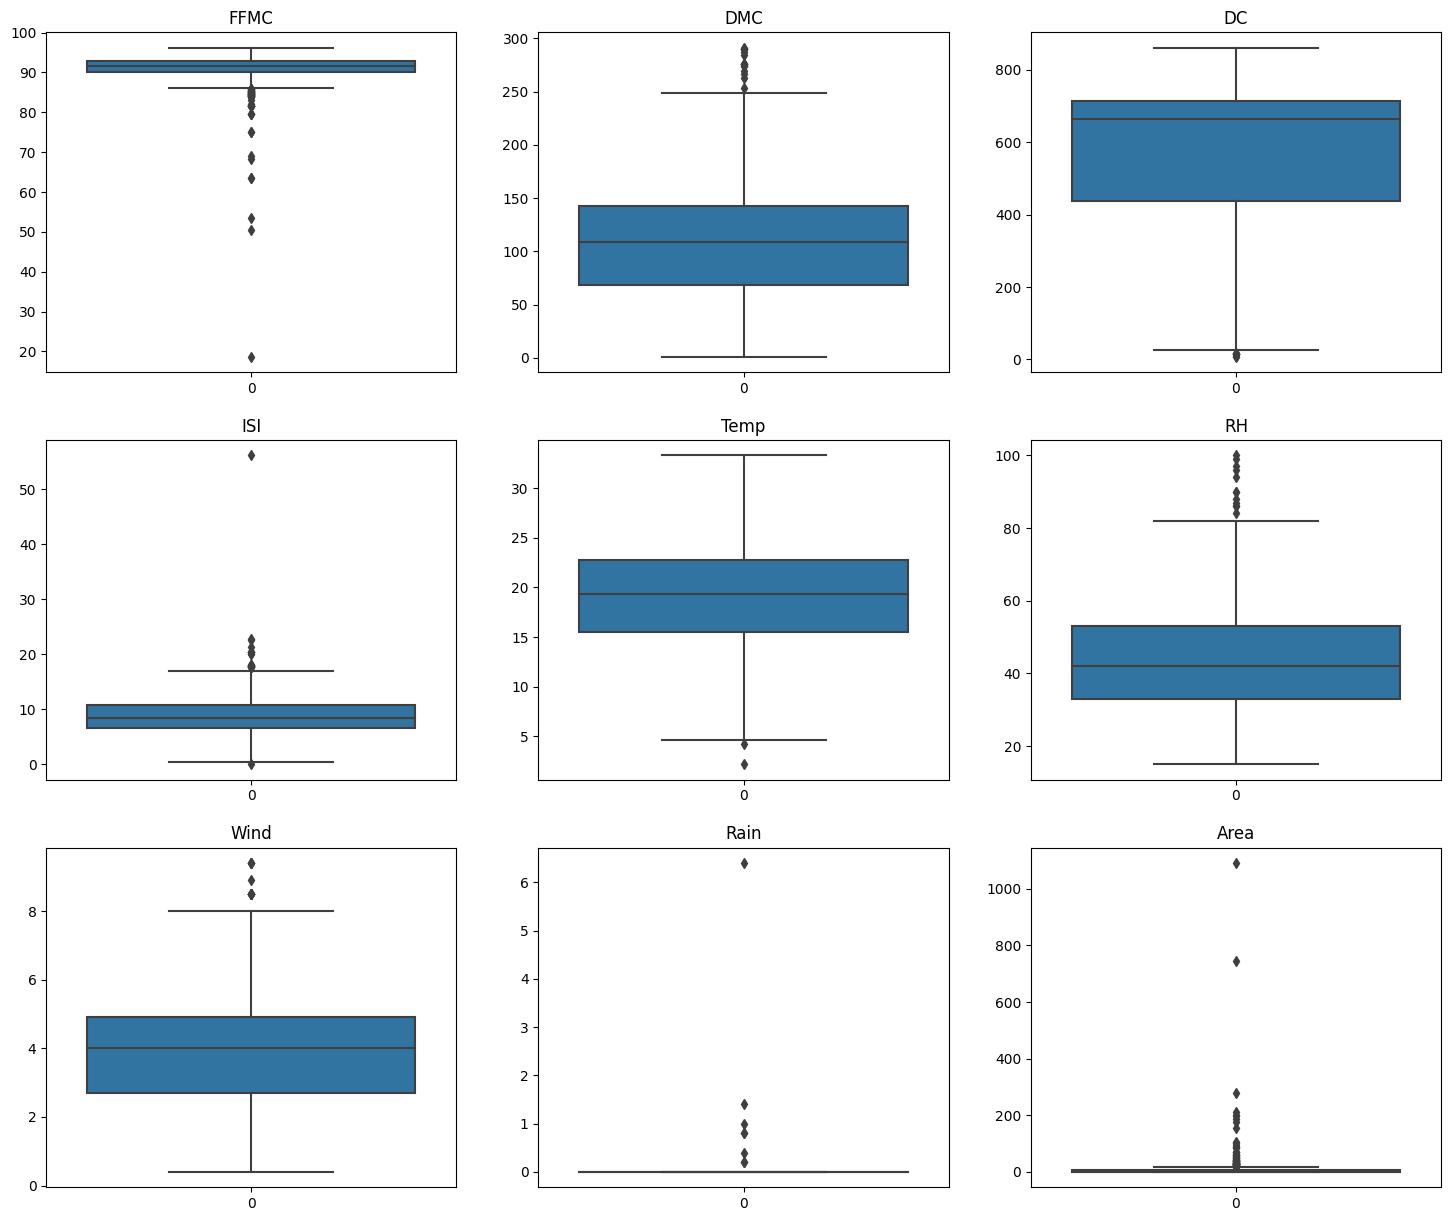

In [81]:
# Plotting multiple boxplots within the same figure
fig, axes = plt.subplots(3, 3, figsize = (18, 15))

sns.boxplot(ax = axes[0, 0], data = fire_data['FFMC']).set_title('FFMC')
sns.boxplot(ax = axes[0, 1], data = fire_data['DMC']).set_title('DMC')
sns.boxplot(ax = axes[0, 2], data = fire_data['DC']).set_title('DC')
sns.boxplot(ax = axes[1, 0], data = fire_data['ISI']).set_title('ISI')
sns.boxplot(ax = axes[1, 1], data = fire_data['temp']).set_title('Temp')
sns.boxplot(ax = axes[1, 2], data = fire_data['RH']).set_title('RH')
sns.boxplot(ax = axes[2, 0], data = fire_data['wind']).set_title('Wind')
sns.boxplot(ax = axes[2, 1], data = fire_data['rain']).set_title('Rain')
sns.boxplot(ax = axes[2, 2], data = fire_data['area']).set_title('Area')


As expected, there are drastic outliers in specific columns, namely:
- FFMC
- ISI
- Rain
- Area

<Axes: xlabel='X', ylabel='Y'>

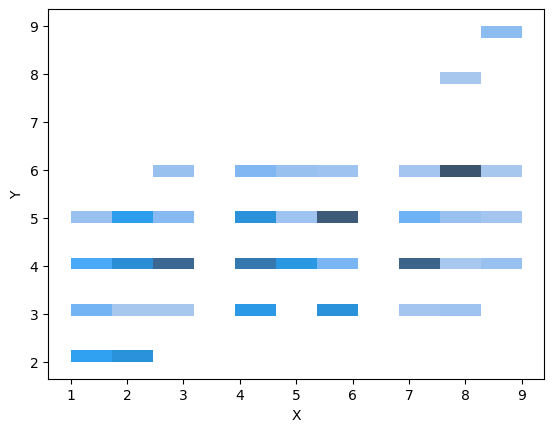

In [82]:
# Visualising the map because I'm curious
sns.histplot(x = fire_data['X'], y = fire_data['Y'])

# Preprocessing
Flipping categorical values to OneHotEncoder encoded values.

In [83]:
# Creating onh encoded columns using pandas' get_dummies() method
# specifying the column, the prefix for output, and separator -> month_<col_value>
# dtype to be int to have it as 1/0

# Encoded column for Months
onh_month = pd.get_dummies(fire_data['month'], prefix = 'month', prefix_sep = '_', dtype = int)

# Encoded column for Days
onh_day = pd.get_dummies(fire_data['day'], prefix = 'day', prefix_sep = '_', dtype = int)

# Concatenating columns to original frame
encoded_fire = pd.concat([fire_data, onh_month, onh_day], axis = 1).copy(deep = True)

encoded_fire

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,...,month_nov,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,...,0,0,0,1,0,0,0,0,0,0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,...,0,1,0,0,0,0,0,0,1,0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,...,0,1,0,0,0,1,0,0,0,0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,...,0,0,0,1,0,0,0,0,0,0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,...,0,0,0,0,0,0,1,0,0,0
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,...,0,0,0,0,0,0,1,0,0,0
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,...,0,0,0,0,0,0,1,0,0,0
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,...,0,0,0,0,0,1,0,0,0,0


<Axes: xlabel='month', ylabel='Count'>

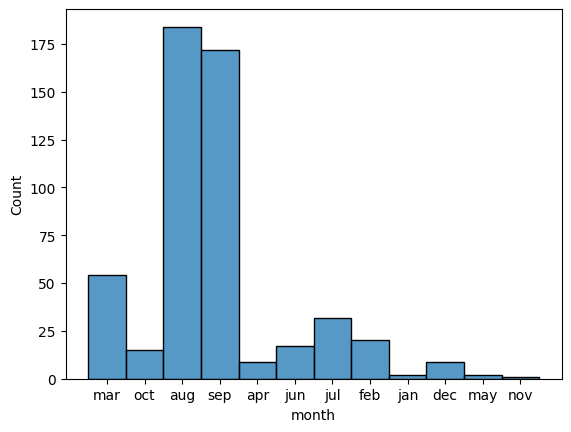

In [84]:
# Visualising months when fires would be most occuring
sns.histplot(encoded_fire['month'])

We can see that the majority of fires take place during August and Septembre.

In [85]:
# dropping encoded columns
encoded_fire = encoded_fire.drop(['month', 'day'], axis = 1)

encoded_fire

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,month_nov,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,1,0,0,0,0,0,0
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,1,0,0,0,0,0,0,1,0
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,1,0,0,0,1,0,0,0,0
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,1,0,0,0,0,0,0
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,1,0,0,0
513,2,4,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,1,0,0,0
514,7,4,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,1,0,0,0
515,1,4,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,1,0,0,0,0


In [86]:
# Might try adding more noise
# Known as Data Augmentation, More values the better
def add_rnd_noise(data, noisecoef = 0.01):
    return data + np.random.normal(0, noisecoef, data.shape)

noisy_dat = add_rnd_noise(encoded_fire)

encoded_fire = pd.concat([encoded_fire, noisy_dat], axis = 0)

In [118]:
# Needing to scale the area (Logarithmically)
encoded_fire['area'] = encoded_fire['area'] * 10000
encoded_fire['area'] = np.where(encoded_fire['area'] <= 0.1, encoded_fire['area'] + (10 ** -6), abs(np.log1p(encoded_fire['area'])))
encoded_fire['area'].describe()

count    1034.000000
mean        5.709761
std         4.472962
min         0.000001
25%         0.000001
50%         9.210440
75%         9.210440
max         9.210440
Name: area, dtype: float64

In [119]:
encoded_fire['area'] = np.where(encoded_fire['area'] <= 2.5, 0, 1)
encoded_fire['area'].describe()

count    1034.000000
mean        0.619923
std         0.485640
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: area, dtype: float64

In [120]:
# Normalising values
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()

encoded_fire.iloc[:, :9] = std_scale.fit_transform(encoded_fire.iloc[:, :9])

encoded_fire

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,month_nov,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
0,1.008366,0.569641,-0.805947,-1.323323,-1.830478,-0.860959,-1.842700,0.411706,1.498756,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1.008366,-0.244223,-0.008076,-1.179538,0.488889,-0.509694,-0.153291,-0.692460,-1.741877,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
2,1.008366,-0.244223,-0.008076,-1.049820,0.560714,-0.509694,-0.739412,-0.692460,-1.518385,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
3,1.441020,1.383505,0.191391,-1.212359,-1.898268,-0.004752,-1.825461,3.233466,-0.009814,0.200000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,1.441020,1.383505,-0.243811,-0.931041,-1.798601,0.126972,-1.291056,3.356151,-1.239020,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,-0.292201,-1.058199,-1.639817,-0.846726,0.474749,-1.561965,1.538653,-0.753575,-0.742213,-0.000895,...,-0.011126,-0.006987,0.006635,-0.017156,-0.002816,-0.006632,1.003144,0.006665,0.004525,-0.003224
513,-1.155061,-0.241079,-1.639786,-0.846563,0.474771,-1.565045,0.520217,1.638794,1.007473,0.004709,...,0.008486,-0.018653,-0.001641,0.008464,-0.005005,-0.008058,0.999393,0.004053,0.002646,-0.005092
514,1.006487,-0.248656,-1.638156,-0.846521,0.474711,-1.565050,0.399640,1.576856,1.494482,0.003364,...,-0.005349,-0.013888,-0.001844,0.008288,0.006075,0.006786,0.998993,-0.008791,-0.012447,0.004114
515,-1.587854,-0.240245,0.681321,0.549002,0.269369,0.502365,1.155028,-0.141301,-0.000840,0.000640,...,-0.003968,0.008375,-0.003147,0.002452,-0.004149,1.019897,-0.005875,-0.000809,0.005562,0.003121


# Column Selection
Considering we want to predict the Coordinates of the fire, we'll split the data into 2:
- Area.
- Climate Data.

In [121]:
# Splitting Data into input/output
area = encoded_fire.loc[:, 'area']

atm_date = encoded_fire.drop(columns=['rain', 'area'])

area.describe()

count    1034.000000
mean        0.619923
std         0.485640
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: area, dtype: float64

In [122]:
# Importing Keras' NN Modules
from keras.layers import Dense          # Neuron Layers (In, Hidden, Out)
from keras.models import Sequential     # Sequential Model

In [123]:
# Assigning a name to model
area_predict = Sequential(name = 'Area_Size')

# Adding layers
area_predict.add(Dense(30, input_shape = (atm_date.shape[1], ), activation = 'relu'))
area_predict.add(Dense(25, activation = 'relu'))
area_predict.add(Dense(10, activation = 'relu'))
area_predict.add(Dense(5, activation = 'relu'))
area_predict.add(Dense(1))

In [124]:
# Setting: Loss Function, Optimizer, and Metrics
area_predict.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics=['mse', 'mae'])
area_predict.summary()

Model: "Area_Size"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 30)                870       
                                                                 
 dense_41 (Dense)            (None, 25)                775       
                                                                 
 dense_42 (Dense)            (None, 10)                260       
                                                                 
 dense_43 (Dense)            (None, 5)                 55        
                                                                 
 dense_44 (Dense)            (None, 1)                 6         
                                                                 
Total params: 1966 (7.68 KB)
Trainable params: 1966 (7.68 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [125]:
# Storing training history over epochs
# Fingers crossed compooter no go boom
progress = area_predict.fit(atm_date, area, validation_split = 0.4, epochs = 50, batch_size = 50)

Epoch 1/50


13/13 [==============================] - 1s 19ms/step - loss: 0.4655 - mse: 0.4655 - mae: 0.5123 - val_loss: 0.6255 - val_mse: 0.6255 - val_mae: 0.7285
Epoch 2/50
13/13 [==============================] - 0s 5ms/step - loss: 0.3582 - mse: 0.3582 - mae: 0.4982 - val_loss: 0.4222 - val_mse: 0.4222 - val_mae: 0.6172
Epoch 3/50
13/13 [==============================] - 0s 4ms/step - loss: 0.2880 - mse: 0.2880 - mae: 0.4915 - val_loss: 0.3003 - val_mse: 0.3003 - val_mae: 0.5207
Epoch 4/50
13/13 [==============================] - 0s 4ms/step - loss: 0.2686 - mse: 0.2686 - mae: 0.4866 - val_loss: 0.2737 - val_mse: 0.2737 - val_mae: 0.4988
Epoch 5/50
13/13 [==============================] - 0s 5ms/step - loss: 0.2580 - mse: 0.2580 - mae: 0.4821 - val_loss: 0.2625 - val_mse: 0.2625 - val_mae: 0.4910
Epoch 6/50
13/13 [==============================] - 0s 4ms/step - loss: 0.2482 - mse: 0.2482 - mae: 0.4773 - val_loss: 0.2716 - val_mse: 0.2716 - val_mae: 0.5035
Epoch 7/50
13/13 [====================

In [126]:
# Evaluating Model Scores
area_predict.evaluate(atm_date, area)

33/33 [==============================] - 0s 1ms/step - loss: 0.1427 - mse: 0.1427 - mae: 0.3133


[0.14270563423633575, 0.14270563423633575, 0.31332167983055115]

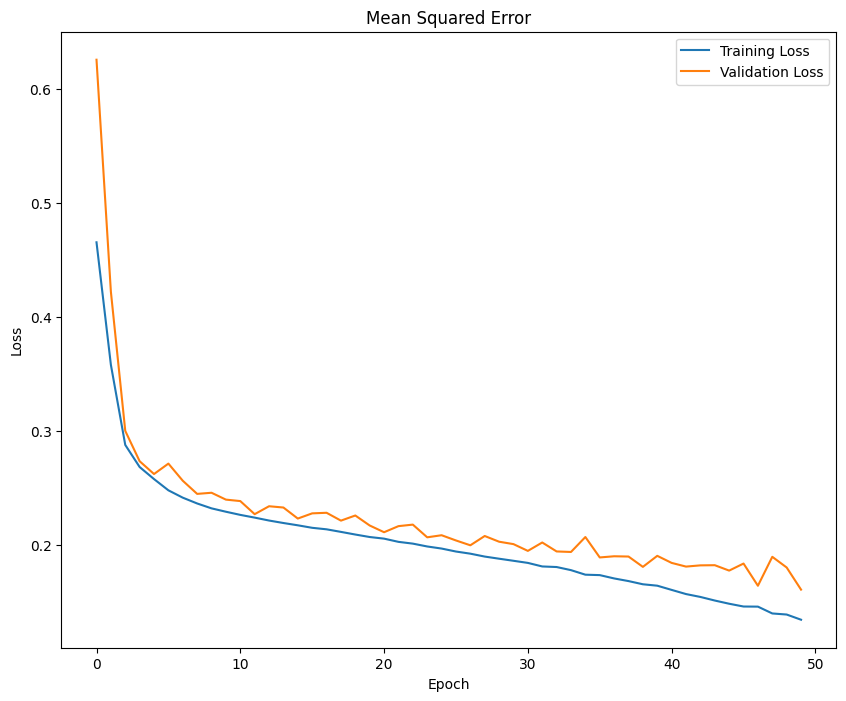

In [127]:
# Visualizing the rates and keys
# Doing this for the sake of the report
# Plot training history
plt.figure(figsize=(10, 8))

# Plot training & validation loss values
plt.plot(progress.history['loss'], label='Training Loss')
plt.plot(progress.history['val_loss'], label='Validation Loss')
plt.title('Mean Squared Error')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()